In [4]:
import matplotlib.pyplot as plt
import numpy as np 
from scipy.optimize import minimize, rosen, rosen_der
from scipy import interpolate
import scipy
import os 
from scipy.optimize import curve_fit
from scipy.integrate import simps
import pandas as pd

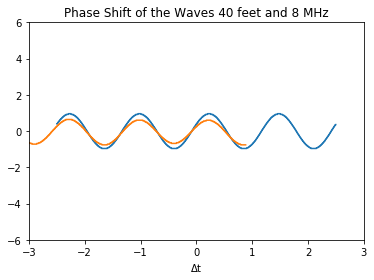

In [25]:
time_differences_all = [] 
#change the value for the x loop and y loop 
for x in [40]:
    x = str(x)
    time_difs = [] 
    for y in [8]: 
        y = str(y)
        curve1 = pd.read_csv("C:/Users/19133/Documents/New_Light/" + x + "/" + y + "/ALL0000/F0000CH1.csv",header=None)
        curve2 = pd.read_csv("C:/Users/19133/Documents/New_Light/" + x + "/" + y + "/ALL0000/F0000CH2.csv",header=None)
        
        #making them on the same scale from the data 
        curve2_scale = float(curve2[1][8])/float(curve1[1][8])
        
        #I just multiplied by 10**7 to get better intuition about the plots
        #I undo it later by multiplying by 10**-7
        plt.plot(curve1[3]*(10**7), curve1[4])
        plt.plot(curve2[3]*(10**7) - 1.615, curve2[4]/curve2_scale) #THIS is where you change shift 

        plt.ylim(-6,6)
        plt.xlim(-3,3)

        plt.xlabel('$\Delta$t')
        plt.title('Phase Shift of the Waves ' + x + ' feet and ' + y + ' MHz')
        plt.savefig('fig')
        plt.show()

In [74]:
distances = [18*0.3048,24*0.3048,30*0.3048,36*0.3048,40*0.3048]
#These were my values 
shifts = [[125.5,136.5,142.5,141,137], [137,140,148,146,143], [144,147,154,153,149], [150,153.5,160,159,155],[155,159,167,165.5,161.5]]
shifts = np.array(shifts)
distances = np.array(distances)
shifts_averages = [] 
errors = [] 
for x in shifts: 
    a = np.mean(x)
    shifts_averages.append(a)
    error = np.sqrt((np.sum((x-a)**2)/4))/np.sqrt(5)
    errors.append(error)
shifts_averages = np.array(shifts_averages)*(10**-9)

In [88]:
errors = np.array(errors)

array([2.97909382, 1.98494332, 1.86010752, 1.83030052, 2.17600551])

In [36]:
weights = (errors*np.sqrt(5))**(-1)

In [84]:
full_errors = [] 
for x in errors: 
    pythag = np.sqrt(x**2 + 1)
    full_errors.append(pythag)

In [85]:
full_errors = np.array(full_errors)*(10**(-9))

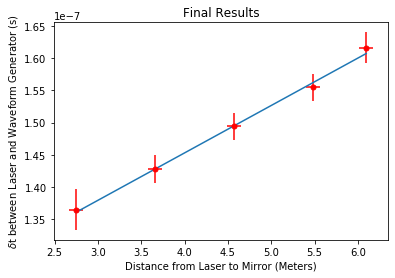

In [95]:
#plt.plot(shifts_averages,distances/2,'ro')
plt.errorbar(distances/2,shifts_averages, yerr=full_errors, xerr=[.08,.08,.08,.08,.08], fmt='ro',markersize='5')
m, b = np.polyfit(distances/2,shifts_averages,1,w=weights)
plt.plot(distances/2, m*distances/2 + b,label='y={:.2f}x+{:.2f}'.format(m,b))
plt.xlabel('Distance from Laser to Mirror (Meters)')
plt.ylabel('$\delta$t between Laser and Waveform Generator (s)')
plt.title('Final Results')
plt.savefig('final')

In [89]:
m**(-1)

136103780.22356522